In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
cd /gdrive/My\ Drive

/gdrive/My Drive


In [ ]:
cd Hough_transform

/gdrive/My Drive/Hough_transform


In [ ]:
import cv2
import numpy as np
import random
import skimage
from matplotlib import pyplot as plt
import pandas as pd
import time
from google.colab import files

In [ ]:
import randomized_hough_transform_edited

In [ ]:
original_image=plt.imread("27/108_3HC.png")
img=cv2.imread("27/108_3HC.png")
print('Maximum  value in this image {}'.format(original_image.max()))
print('Minimum  value in this image {}'.format(original_image.min()))
print('original_image.shape :{}'.format(np.shape(original_image)))

Maximum  value in this image 0.9529411792755127
Minimum  value in this image 0.0
original_image.shape :(540, 800)


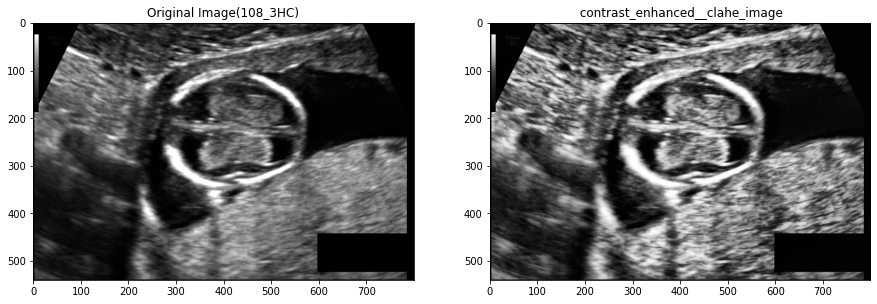

In [ ]:
import cv2
# img=cv2.imread("27/108_3HC.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)
display = [img, clahe_img  ]
label = ['Original Image(108_3HC)', ' contrast_enhanced__clahe_image']
fig = plt.figure(figsize=(15,15))
for i in range(len(display)):
  fig.add_subplot(2, 2, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

**Bilateral Filtering for noise removal**

Maximum  value in new image 254
Minimum  value in new image 1


<Figure size 432x288 with 0 Axes>

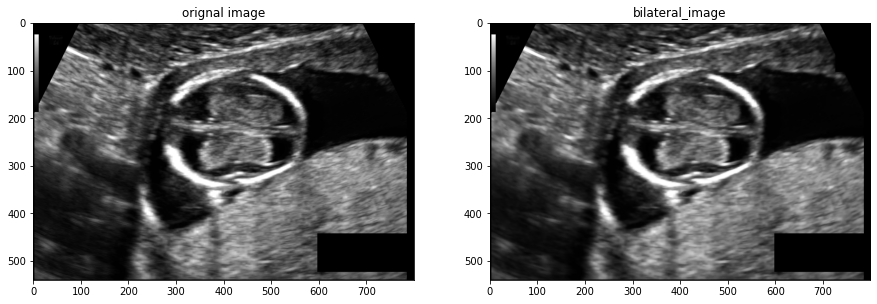

In [ ]:
imgc=np.copy(original_image*255)

print('Maximum  value in new image {}'.format(clahe_img.max()))
print('Minimum  value in new image {}'.format(clahe_img.min()))
bilateral_imgc=cv2.bilateralFilter(imgc,5,20,25)   ####20 and 25 for 108 images and 30 and 35 or a bit above for 107 images.

plt.figure(2)
fig, axs = plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,15))
axs[0].set_title('orignal image')
axs[0].imshow(imgc,cmap="gray")

axs[1].set_title('bilateral_image')
axs[1].imshow(bilateral_imgc,cmap="gray")
plt.show()
# diff=clahe_img-bilateral_imgc
# plt.figure(),plt.imshow(diff,'gray')

**White Tophat Filtering**

<Figure size 432x288 with 0 Axes>

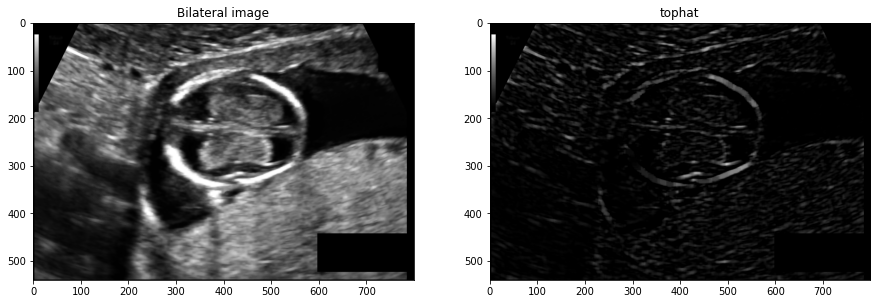

In [ ]:
filterSize =(11,11) 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,  
                                   filterSize)
tophat_img = cv2.morphologyEx(bilateral_imgc,  
                              cv2.MORPH_TOPHAT, 
                              kernel) 
plt.figure(2)
fig, axs = plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,15))
axs[0].set_title('Bilateral image')
axs[0].imshow(bilateral_imgc,cmap="gray")

axs[1].set_title('tophat')
axs[1].imshow(tophat_img,cmap="gray")
plt.show()


**KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans
img = tophat_img
img2 = img.reshape(img.shape[0] * img.shape[1],1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(img2)
[V_centre,cmap]=kmeans.cluster_centers_,kmeans.labels_
#kmeans.labels_.shape

In [ ]:
pixel_values=tophat_img.reshape((-1,1))
np.unique(pixel_values)
pixel_values.shape
#np.unique(pixel_values)

(432000, 1)

In [ ]:
#[V_centre,cmap]=run_kmeans(tophat_img)#cmap kmeans labels

**Finding the Threshold value for binarizing from Kmeans**

In [ ]:

centers=np.uint8(V_centre)
max_center=np.max(centers)
index=np.where(cmap==np.max(cmap))
[R,W]=tophat_img.shape
#row=np.floor_divide(index[0],W)
#column=index[0] % W
mu=np.mean(pixel_values[index[0]])
std=np.std(pixel_values[index[0]])
T=mu-(0.65*std)   ###varry the thresholding value to obtain desired thresholded image
# if (pixel_values[0] > T):
#       pixel_values[0]=255
# else:
#       pixel_values[0]=0
      
Thresh_index=np.where(pixel_values>T)
#Thresh_index=Thresh_index.reshape((-1,1))
Thresh_row=np.floor_divide(Thresh_index[0],W)
Thresh_col=np.mod(Thresh_index[0],W)
# Thresh_index=np.where(pixel_values)
# print(np.shape(Thresh_index))
# #Thresh_index=Thresh_index.reshape[(-1,1)]
# Thresh_row=np.floor_divide(Thresh_index[0],W)
# Thresh_col=np.mod(Thresh_index[0],W)
#image_threhold=np.

In [ ]:
np.unique(cmap)
V=V_centre
# mean = np.mean(tophat_img.reshape(img.shape[0] * img.shape[1]), axis=0)
# std = np.std(tophat_img.reshape(img.shape[0] * img.shape[1]), axis=0)
# std
#np.unique(cmap)
V

array([[89.22633  ],
       [ 3.0719032],
       [28.283598 ]], dtype=float32)

In [ ]:
np.shape(Thresh_col)

(59485,)

**Image Thresholding**

<Figure size 432x288 with 0 Axes>

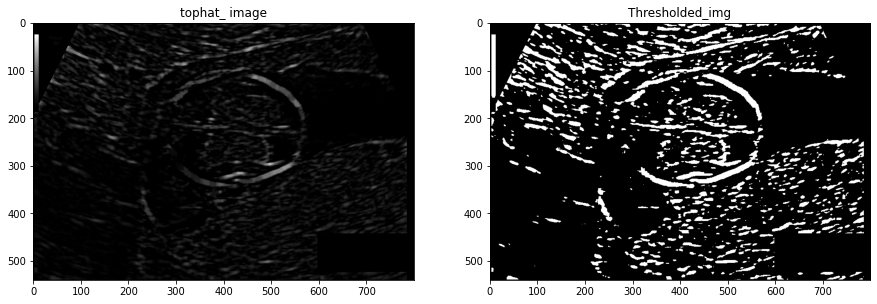

In [ ]:
Thresholded_img=np.zeros(img.shape)

Thresholded_img[Thresh_row,Thresh_col]=255
plt.figure(2)
fig, axs = plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,15))
axs[0].set_title('tophat_ image')
axs[0].imshow(tophat_img,cmap="gray")

axs[1].set_title('Thresholded_img')
axs[1].imshow(Thresholded_img,cmap="gray")
plt.show()

<Figure size 432x288 with 0 Axes>

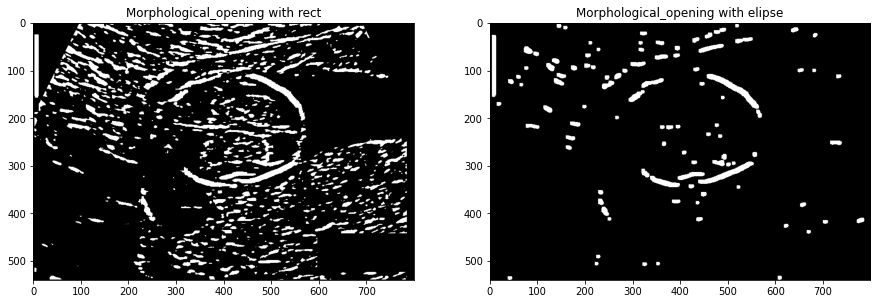

In [ ]:
filterSize =(2,2) 
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,  
                                  filterSize)
kernel2 =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,8))   # varry the kernel size to obtain the desired edges
opening1 = cv2.morphologyEx(Thresholded_img, cv2.MORPH_OPEN, kernel1)
opening2 = cv2.morphologyEx(Thresholded_img, cv2.MORPH_OPEN, kernel2)
plt.figure(2)
fig, axs = plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,15))
axs[0].set_title('Morphological_opening with rect')
axs[0].imshow(Thresholded_img,cmap="gray")

axs[1].set_title('Morphological_opening with elipse')
axs[1].imshow(opening2,cmap="gray")
plt.show()

<Figure size 432x288 with 0 Axes>

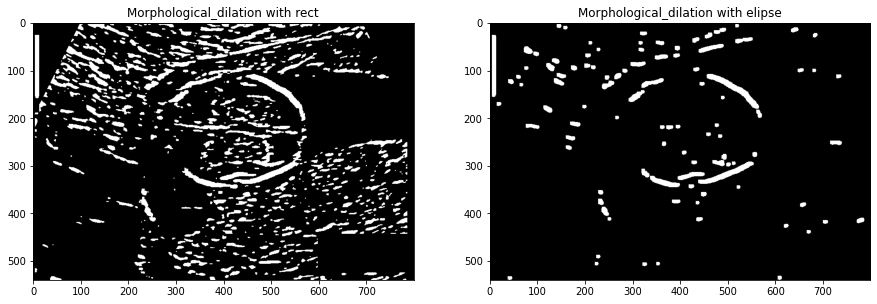

In [ ]:
filterSize =(1,1) 
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,  
                                  filterSize)
kernel2 =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
dilation1 = cv2.dilate(opening1,kernel1,iterations = 1)
dilation2 = cv2.dilate(opening2,kernel2,iterations = 1)
plt.figure(2)
fig, axs = plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,15))
axs[0].set_title('Morphological_dilation with rect')
axs[0].imshow(dilation1,cmap="gray")

axs[1].set_title('Morphological_dilation with elipse')
axs[1].imshow(dilation2,cmap="gray")
plt.show()

<Figure size 432x288 with 0 Axes>

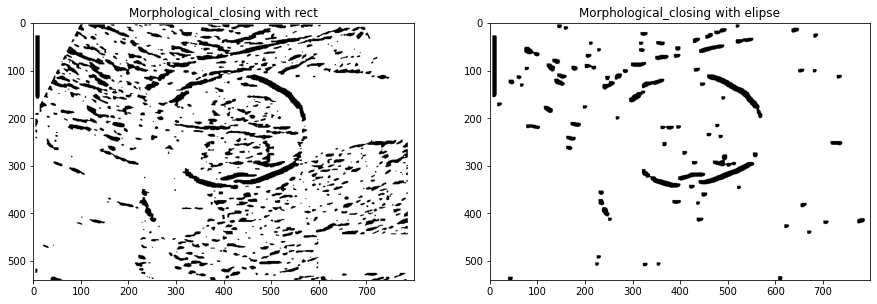

In [ ]:
filterSize =(2,2) 
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT,  
                                  filterSize)
kernel2 =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
closing1 = cv2.morphologyEx(dilation1, cv2.MORPH_CLOSE, kernel1)
closing2 = cv2.morphologyEx(dilation2, cv2.MORPH_CLOSE, kernel2)
plt.figure(2)
fig, axs = plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,15))
axs[0].set_title('Morphological_closing with rect')
axs[0].imshow(closing1,cmap="binary")

axs[1].set_title('Morphological_closing with elipse')
axs[1].imshow(closing2,cmap="binary")
plt.show()

In [ ]:
#closing2=np.double(closing2)

def im2double(im):
    min_val = np.min(im.ravel())
    max_val = np.max(im.ravel())
    out = (im.astype('float') - min_val) / (max_val - min_val)
    return out
closing2 = im2double(closing2)
np.unique(closing2)

array([0., 1.])

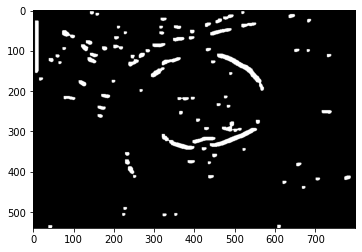

In [ ]:
plt.imshow(closing2,cmap='gray')

<Figure size 432x288 with 0 Axes>

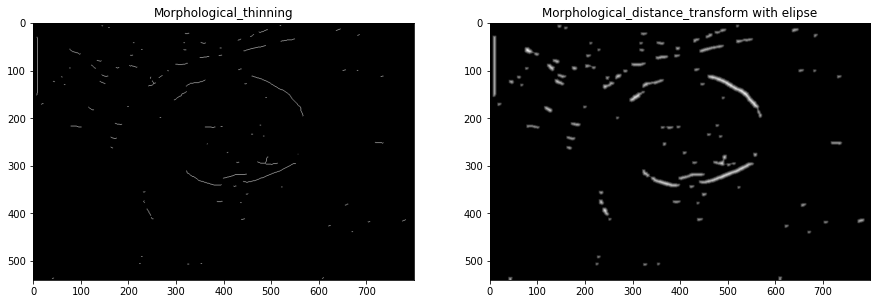

In [ ]:
from scipy import ndimage
import skimage.morphology as morphology

#import cv2 as cv

# dist = cv2.distanceTransform(closing2, cv2.DIST_L1, 3)
# # Normalize the distance image for range = {0.0, 1.0}
# # so we can visualize and threshold it
# cv.normalize(dist, dist, 0, 1.0, cv.NORM_MINMAX)
# #cv2.imshow('Distance Transform Image', dist)
# _, dist = cv.threshold(dist, 0.4, 1.0, cv.THRESH_BINARY)
out_skeletonize = morphology.skeletonize(closing2)
out_thin = morphology.thin(closing2)


out_distance_transform, inds = ndimage.distance_transform_edt(closing2, return_indices=True)
plt.figure(2)
fig, axs = plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,15))
axs[0].set_title('Morphological_thinning')
axs[0].imshow(out_skeletonize,cmap="gray")

axs[1].set_title('Morphological_distance_transform with elipse')
axs[1].imshow(out_distance_transform,cmap="gray")
plt.show()

In [ ]:
# from google.colab import files

# test = plt.figure()
# plt.imshow(out_skeletonize,cmap="gray")
# plt.figure(figsize=(25,25))
# test.show()

# # test.savefig('out_skeletonize.png')
# # files.download('out_skeletonize.png')

**Skeletonize Filtered morphological distance transform image**

<Figure size 432x288 with 0 Axes>

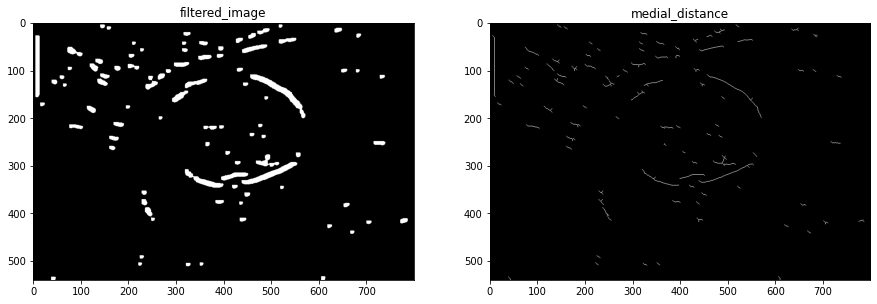

In [ ]:
from skimage.morphology import medial_axis, skeletonize
#thin2=cv2.imread('binarized_filtered_image.png')
#thin2 = im2double(thin2)
plt.figure(1)
fig, axs = plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(15,15))
axs[0].set_title('filtered_image')
axs[0].imshow(closing2,cmap="gray")
#plt.imshow(thin,cmap="gray")
skel, distance = medial_axis(out_distance_transform, return_distance=True)
dist_on_skel = distance * skel
axs[1].set_title('medial_distance')
axs[1].imshow(skel,cmap="gray")

In [ ]:
###Image flow diagram

In [ ]:
###ITERATIVE NORMALISED HOUGH TRANSFORM
#thin=cv2.imread('out_skeletonize.png')

In [ ]:
edge = np.copy(skel*255)

edge_pixels = np.array(np.where(edge == 255)).T



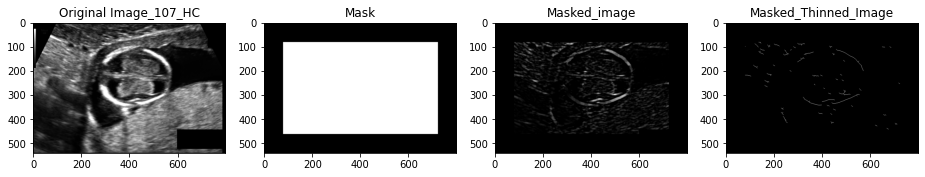

In [ ]:
# Create the basic mask
mask2=np.copy(img)
image=np.copy(mask2)
Basic_mask = np.ones(shape=image.shape[0:2], dtype="bool")
masked_skel=np.copy(skel)
# Draw a filled rectangle on the mask image
#rr, cc = skimage.draw.rectangle(start=(59,59), end=(480,740))
rr, cc = skimage.draw.rectangle(start=(79,79), end=(460,720))
Basic_mask[rr, cc] = False
image[Basic_mask] = 0
masked_skel[Basic_mask] = 0
Basic_mask=255-Basic_mask
display = [original_image, Basic_mask,image,masked_skel ]
label = ['Original Image_107_HC','Mask','Masked_image','Masked_Thinned_Image' ]

fig = plt.figure(figsize=(20,25))

for i in range(len(display)):
  fig.add_subplot(5,5, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()

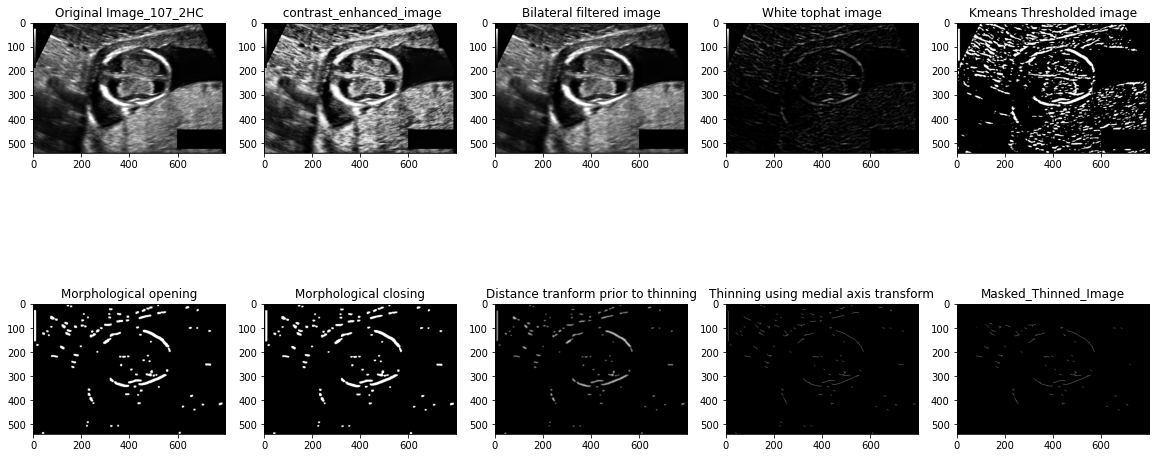

In [ ]:

display = [original_image, clahe_img ,bilateral_imgc,tophat_img,Thresholded_img,opening2,closing2,out_distance_transform,skel,masked_skel ]
label = ['Original Image_107_2HC', ' contrast_enhanced_image','Bilateral filtered image','White tophat image','Kmeans Thresholded image','Morphological opening','Morphological closing','Distance tranform prior to thinning','Thinning using medial axis transform','Masked_Thinned_Image']

fig = plt.figure(figsize=(20,25))

for i in range(len(display)):
  fig.add_subplot(5,5, i+1)
  plt.imshow(display[i], cmap = 'gray')
  plt.title(label[i])

plt.show()

In [ ]:
# m=np.zeros((15,15))
# halfsize=len(m)//2
# padded_matrix =np.pad(m,((halfsize, halfsize), (halfsize, halfsize)), 'constant', constant_values=(100))

In [ ]:
mask=np.zeros(edge.shape)
accumulator = []
center=[]
mask_binary = np.zeros(edge.shape, dtype=bool)
mask_binary[mask == 255] = False
mask_binary[mask != 255] = True

In [ ]:
# np.unique(mask_binary)
# mask=np.zeros(mask_binary.shape)
# mask[mask_binary==True]=255
# np.unique(mask)
# mask.shape

In [ ]:
edge = np.copy(masked_skel*255)

edge_pixels = np.array(np.where(edge == 255)).T

In [ ]:
import randomized_hough_transform_edited

In [ ]:
mask=np.ones((img.shape))*255
mask_binary=np.zeros(mask.shape,dtype=bool)
mask_binary[mask==255]=True
mask_binary[mask!=255]=False

**Randomized Hough Transform**

In [ ]:

K=[]
for i in range (1,20):              #Reduce the itteration size while checking to see results in less time but may not give optimal results.
    test= randomized_hough_transform_edited.FindEllipseRHT(iters=1000)
    ti=time.time()
    p,q,major,minor,angle,score=test.run(edge,mask_binary)
    if major<100 and minor>60 :   #major and minor bound user defined
       continue
    # elif score >=5:   
    elif score >=5:   #score=3 for 107 and score =4/5 for 108
          print(p,q,major,minor,angle,score)
          v=[p,q,major,minor,angle,score]
          K.append(v)
        
    # else: continue

431 219 153 103 0.14044914111588733 5.0
440 215 148 98 0.26598854155991436 5.0
415 224 153 116 -0.09022243386561923 6.0
408 226 168 113 -0.043210695299013724 5.0
421 225 154 111 0.00385614916331005 7.0
422 225 146 114 -0.057660934077851514 6.0
395 215 180 118 0.11699267740207192 5.0
418 223 146 115 -0.10790244103257828 8.0
419 223 151 114 -0.03520530215894375 10.0
416 226 158 111 -0.07781143291504691 6.0


In [ ]:
len(K)

10

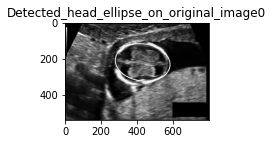

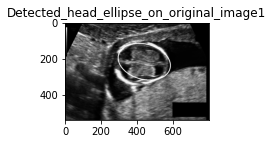

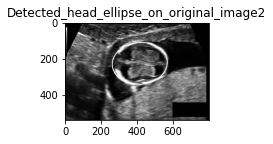

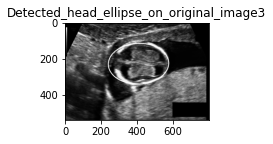

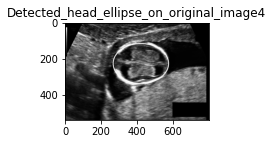

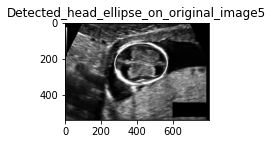

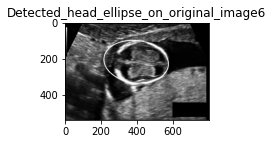

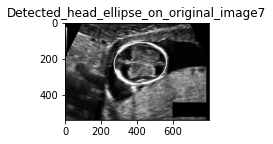

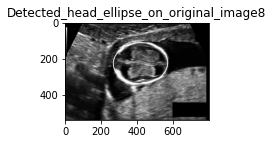

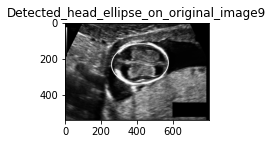

In [ ]:
detected_ellipse=[]
for i in range (len(K)):
    [p,q,major,minor,angle,score]=K[i]
    original_image=plt.imread("27/108_3HC.png")      
    ellipse_with_orignal =cv2.ellipse(original_image, (p,q), (major,minor), angle*180/np.pi, 0, 360, color=1, thickness=3)
    #detected_ellipse.append[ellipse_with_orignal]
    # display = [ellipse_with_orignal[i] ]
    # label = ['Detected_head_ellipse_on_original_image{}'.format(i)]

    fig = plt.figure(figsize=(18,18))

    # #for i in range(len(display)):
    fig.add_subplot(2,len(K)//2+1, i+1)
    plt.imshow(ellipse_with_orignal, cmap = 'gray')
    plt.title('Detected_head_ellipse_on_original_image{}'.format(i))
plt.show()

In [ ]:
##choose one of the best matched ellipse 
[p,q,major,minor,angle,score]=K[8]
K[8]

[419, 223, 151, 114, -0.03520530215894375, 10.0]

In [ ]:
#For comparision with ground truth

original_image=plt.imread("27/108_3HC.png")

ellipse_with_original =cv2.ellipse(original_image, (p,q), (major,minor), angle*180/np.pi, 0, 360, color=1, thickness=2)

Text(0.5, 1.0, 'Detected_head_ellipse_on_original_image 419,223,151,114,-0.03520530215894375,10.0_107_2HC')

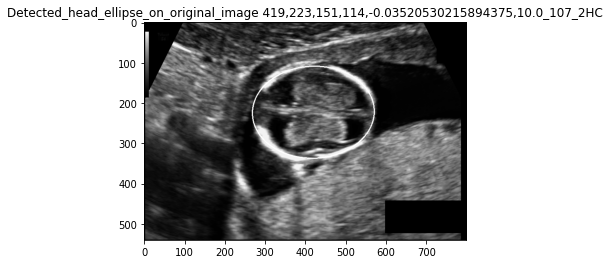

In [ ]:
plt.imshow(ellipse_with_original,'gray')
plt.title('Detected_head_ellipse_on_original_image {},{},{},{},{},{}_107_2HC'.format(p,q,major,minor,angle,score))
# fig.savefig('out/Part 3/Detected_head_ellipse_on_original_image_484, 186, 133, 87, 0.09689069353390627, 5.0.png')
# files.download('out/Part 3/Detected_head_ellipse_on_original_image_454 ,203, 141, 103 ,-0.3900218175965245 ,5.0')

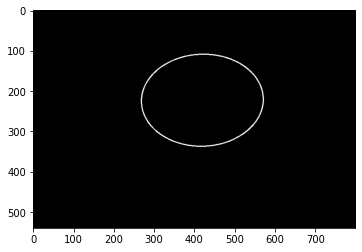

In [ ]:
black=np.zeros(original_image.shape,dtype='double')
ellipse_for_gt_compare =cv2.ellipse(black, (p,q), (major,minor), angle*180/np.pi, 0, 360, color=1, thickness=2)
plt.imshow(ellipse_for_gt_compare,cmap='gray')

In [ ]:
np.max(ellipse_for_gt_compare)

1.0

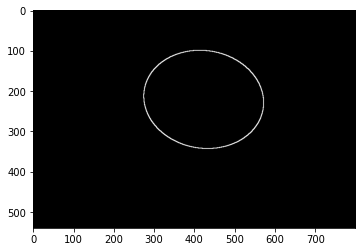

In [ ]:
#Grond Truth
ground_truth_image=plt.imread("27/108_3HC_Annotation.png")
plt.imshow(ground_truth_image,cmap='gray')

In [ ]:
np.max(ground_truth_image)

1.0

In [ ]:
from scipy.spatial.distance import directed_hausdorff
directed_hausdorff(ellipse_for_gt_compare,ground_truth_image)

(6.082762530298219, 111, 101)

(<matplotlib.image.AxesImage at 0x7f0d31511b70>,
 Text(0.5, 1.0, 'Difference of detected ellipse and ground truth_108_3HC'))

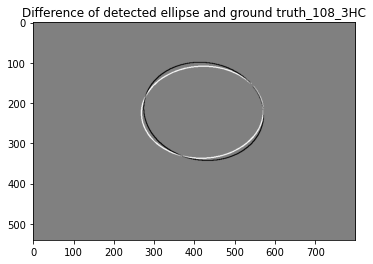

In [ ]:
Difference = ellipse_for_gt_compare - ground_truth_image
plt.imshow(Difference,cmap='gray'),plt.title('Difference of detected ellipse and ground truth_108_3HC')
# fig.savefig('out/Part 3/Difference of detected elliipse and ground truth_108_HC_difference(368 ,265 ,175, 105 ,-0.038507671681268736, 6.0).png')
# files.download('out/Part 3/Difference of detected elliipse and ground truth_108_HC_difference(Detected_head_ellipse_on_original_image_484, 186, 133, 87, 0.09689069353390627, 5.0.png).png')

(<matplotlib.image.AxesImage at 0x7f0d315f42b0>,
 Text(0.5, 1.0, 'Absolute difference of detected ellipse and ground truth_107_2HC'))

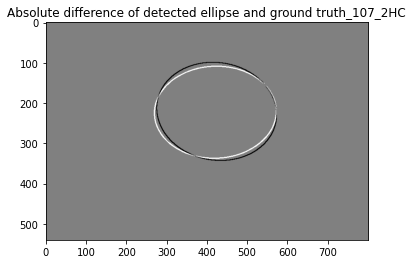

In [ ]:
Absolute_diffrence=np.abs(ellipse_for_gt_compare - ground_truth_image)
plt.imshow(Difference,cmap='gray'),plt.title('Absolute difference of detected ellipse and ground truth_107_2HC')
# fig.savefig('out/Part 3/Absolute diff_Ellipse Detectioon_108_HC(368 ,265 ,175, 105 ,-0.038507671681268736, 6.0).png')
# files.download('out/Part 3/Absolute diff_Ellipse Detectioon_108_HC(368 ,265 ,175, 105 ,-0.038507671681268736, 6.0).png')

Dice similarity Coefficient

In [ ]:
def dice(im1, im2):
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())

In [ ]:
Dice_coefficient=dice(ellipse_for_gt_compare,ground_truth_image)

In [ ]:
Dice_coefficient

0.15272101527210152